# British Airways Task 2

In [1]:

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")

data= r'C:\Users\KALASH SAHARE\Documents\DATA SCIENCE\FORAGE\BA\customer_booking.csv'
df= pd.read_csv(data, encoding='ISO-8859-1')

## Check DATA and Preprocessing

In [3]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [6]:
df.shape

(50000, 14)

In [7]:
df.size

700000

### Checking target variable value count

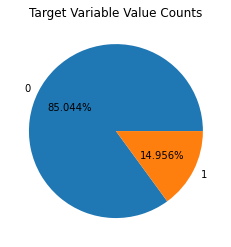

In [8]:
labels = df.booking_complete.unique()
sizes = df.booking_complete.value_counts().values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

In [9]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

## Finding the correlation between features or the best features

### using Correlation matrix

In [10]:
correlation_matrix = df.corr()
target_correlations = correlation_matrix['booking_complete']
sorted_features = target_correlations.abs().sort_values(ascending=False)
for feature in sorted_features.index:
    print(f"Feature: {feature}, Correlation: {target_correlations[feature]}")

Feature: booking_complete, Correlation: 1.0
Feature: flight_duration, Correlation: -0.10626610443249243
Feature: wants_extra_baggage, Correlation: 0.06813851005646078
Feature: wants_preferred_seat, Correlation: 0.05011595841666862
Feature: length_of_stay, Correlation: -0.04240798189575175
Feature: wants_in_flight_meals, Correlation: 0.02651081068232477
Feature: num_passengers, Correlation: 0.02411622390727948
Feature: purchase_lead, Correlation: -0.022130736497934962
Feature: flight_hour, Correlation: 0.0071273049785766296


#### factorising the data set


In [11]:
categorical_columns = [ 'sales_channel', 'trip_type',  'flight_day', 'route',
       'booking_origin']
for column in categorical_columns:
    df[column], _ = pd.factorize(df[column])

In [12]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,0,0,0,1,0,0,5.52,0
1,1,0,0,112,20,3,0,0,0,0,0,0,5.52,0
2,2,0,0,243,22,17,1,0,1,1,1,0,5.52,0
3,1,0,0,96,31,4,0,0,0,0,0,1,5.52,0
4,2,0,0,68,22,15,1,0,1,1,0,1,5.52,0


In [13]:
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']


### using Chi sq test

In [14]:
from sklearn.feature_selection import chi2

chi2_scores, p_values = chi2(X, y)
for feature, chi2_score, p_value in zip(X.columns, chi2_scores, p_values):
    print(f"Feature: {feature}, Chi-Square Score: {chi2_score}, P-Value: {p_value}")
k = 5  # Number of top features to select

sorted_indices_c = chi2_scores.argsort()[::-1]  # For chi-squared scores
sorted_indices_p = p_values.argsort()[::-1] # For p-values
np.argsort(chi2_scores)[::-1]
top_k_features_c = X.columns[sorted_indices_c[:k]]
top_k_features_p = X.columns[sorted_indices_p[:k]]

print('top 5 features based on chi sq score: ',top_k_features_c)
print('top 5 features based on p values: ',top_k_features_p)

Feature: num_passengers, Chi-Square Score: 19.0188763744229, P-Value: 1.2943169012206895e-05
Feature: sales_channel, Chi-Square Score: 74.82388880188324, P-Value: 5.14632162992613e-18
Feature: trip_type, Chi-Square Score: 68.57810616703692, P-Value: 1.2195053659726667e-16
Feature: purchase_lead, Chi-Square Score: 2358.6783375505324, P-Value: 0.0
Feature: length_of_stay, Chi-Square Score: 4480.964771815558, P-Value: 0.0
Feature: flight_hour, Chi-Square Score: 8.207321528933498, P-Value: 0.004172169325625304
Feature: flight_day, Chi-Square Score: 7.096857949327872, P-Value: 0.007721920204633393
Feature: route, Chi-Square Score: 250.31484373917257, P-Value: 2.2171806274436016e-56
Feature: booking_origin, Chi-Square Score: 17902.548232714416, P-Value: 0.0
Feature: wants_extra_baggage, Chi-Square Score: 76.89034736954227, P-Value: 1.8071823460554737e-18
Feature: wants_preferred_seat, Chi-Square Score: 88.28808969249067, P-Value: 5.6583125620989465e-21
Feature: wants_in_flight_meals, Chi-Squ

In [15]:
CHI2_SCORES=pd.DataFrame(data=chi2_scores, index=X.columns)
print(CHI2_SCORES)
P_Values=pd.DataFrame(data=p_values, index=X.columns)
print(P_Values)

                                  0
num_passengers            19.018876
sales_channel             74.823889
trip_type                 68.578106
purchase_lead           2358.678338
length_of_stay          4480.964772
flight_hour                8.207322
flight_day                 7.096858
route                    250.314844
booking_origin         17902.548233
wants_extra_baggage       76.890347
wants_preferred_seat      88.288090
wants_in_flight_meals     20.130962
flight_duration          173.831731
                                  0
num_passengers         1.294317e-05
sales_channel          5.146322e-18
trip_type              1.219505e-16
purchase_lead          0.000000e+00
length_of_stay         0.000000e+00
flight_hour            4.172169e-03
flight_day             7.721920e-03
route                  2.217181e-56
booking_origin         0.000000e+00
wants_extra_baggage    1.807182e-18
wants_preferred_seat   5.658313e-21
wants_in_flight_meals  7.231649e-06
flight_duration        1.077

###  using Recursive Feature Elimination (RFE)

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

selected_features_RFE = X.columns[rfe.support_]
selected_features_RFE

Index(['sales_channel', 'trip_type', 'wants_extra_baggage',
       'wants_preferred_seat', 'flight_duration'],
      dtype='object')

### using Mutual INFO

In [17]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

route                    0.054561
booking_origin           0.049758
flight_duration          0.020910
length_of_stay           0.009715
wants_extra_baggage      0.007927
flight_hour              0.003350
num_passengers           0.003033
sales_channel            0.002995
wants_preferred_seat     0.002967
purchase_lead            0.001176
trip_type                0.001087
wants_in_flight_meals    0.000000
flight_day               0.000000
Name: MI Scores, dtype: float64

### plotting features

In [18]:
def plot_m_scores(scores,label):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title(label)



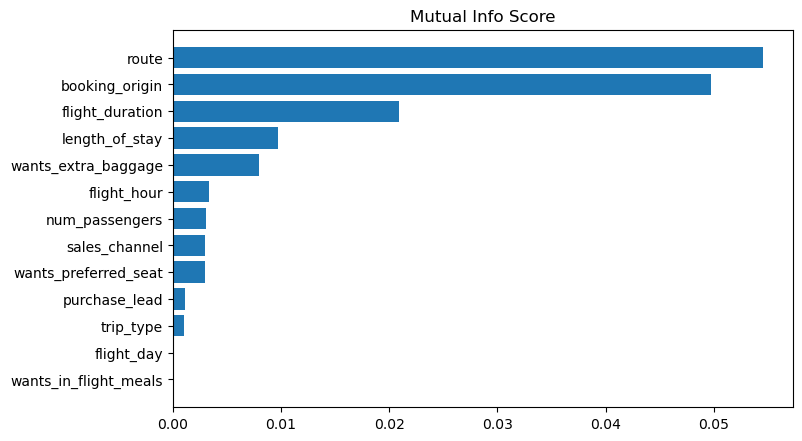

In [19]:
plt.figure(dpi=100, figsize=(8, 5))
plot_m_scores(mi_scores,"Mutual Info Score")

<Figure size 800x500 with 0 Axes>

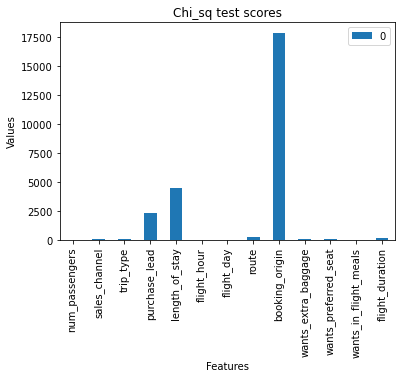

<Figure size 800x500 with 0 Axes>

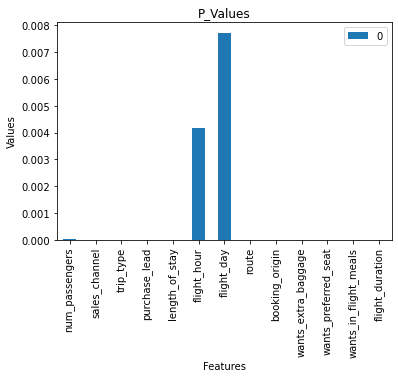

In [20]:
plt.figure(dpi=100, figsize=(8, 5))
CHI2_SCORES.plot(kind='bar')  # Bar graph
plt.xlabel('Features')  # X-axis label
plt.ylabel('Values')  # Y-axis label
plt.title('Chi_sq test scores')
plt.show()

plt.figure(dpi=100, figsize=(8, 5))
P_Values.plot(kind='bar')  # Bar graph
plt.xlabel('Features')  # X-axis label
plt.ylabel('Values')  # Y-axis label
plt.title('P_Values')
plt.show()



In [24]:
MI_features=mi_scores[0:k].index

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


In [26]:
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)
     

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

## Random Forest Classifier


In [28]:
# getting train test data
X = pd.get_dummies(X)
X= scale(X)
train_X,test_X,train_y,test_y=train_test_split(X, y,test_size=0.2,random_state = 0)


### Model 1 RFC on all features

In [29]:

forest_model1= RandomForestClassifier(random_state=1)
forest_model1.fit(train_X, train_y)
preds= forest_model1.predict(test_X)

print('ACCURACY: ',accuracy_score(test_y,preds))
print('AUC score: ',roc_auc_score(test_y,preds))

ACCURACY:  0.8507
AUC score:  0.5484289529236854


### Model 2 RFC on Mutual features

In [32]:
X_Mf=X[MI_features]
train_Xmf,test_Xmf,train_ymf,test_ymf=train_test_split(X_Mf, y,test_size=0.2,random_state = 0)
forest_model2= RandomForestClassifier(random_state=1)
forest_model2.fit(train_Xmf, train_ymf)
preds= forest_model2.predict(test_Xmf)

print('ACCURACY: ',accuracy_score(test_ymf,preds))
print('AUC score: ',roc_auc_score(test_ymf,preds))

ACCURACY:  0.8297
AUC score:  0.5645704316177045


### Model 3 RFC on chi2 features


In [34]:
X_c2=X[top_k_features_c]
train_Xc2,test_Xc2,train_yc2,test_yc2=train_test_split(X_c2, y,test_size=0.2,random_state = 0)
forest_model3= RandomForestClassifier(random_state=1)
forest_model3.fit(train_Xc2, train_yc2)
preds= forest_model3.predict(test_Xc2)

print('ACCURACY: ',accuracy_score(test_yc2,preds))
print('AUC score: ',roc_auc_score(test_yc2,preds))

ACCURACY:  0.8329
AUC score:  0.5822058946185026


### Model 4 RFC on RFE features

In [35]:
X_rfe=X[selected_features_RFE]
train_Xrfe,test_Xrfe,train_yrfe,test_yrfe=train_test_split(X_rfe, y,test_size=0.2,random_state = 0)
forest_model4= RandomForestClassifier(random_state=1)
forest_model4.fit(train_Xrfe, train_yrfe)
preds= forest_model4.predict(test_Xrfe)

print('ACCURACY: ',accuracy_score(test_yrfe,preds))
print('AUC score: ',roc_auc_score(test_yrfe,preds))

ACCURACY:  0.8474
AUC score:  0.4997772340434976


### Model 5 RFC on pvalue features

In [36]:
X_p=X[top_k_features_p]
train_Xp,test_Xp,train_yp,test_yp=train_test_split(X_p, y,test_size=0.2,random_state = 0)
forest_model5= RandomForestClassifier(random_state=1)
forest_model5.fit(train_Xp, train_yp)
preds= forest_model5.predict(test_Xp)

print('ACCURACY: ',accuracy_score(test_yp,preds))
print('AUC score: ',roc_auc_score(test_yp,preds))

ACCURACY:  0.8445
AUC score:  0.5007842950351111


In [37]:
MI_features


Index(['route', 'booking_origin', 'flight_duration', 'length_of_stay',
       'wants_extra_baggage'],
      dtype='object')

In [38]:
top_k_features_c

Index(['booking_origin', 'length_of_stay', 'purchase_lead', 'route',
       'flight_duration'],
      dtype='object')

In [39]:
top_k_features_p

Index(['flight_day', 'flight_hour', 'num_passengers', 'wants_in_flight_meals',
       'trip_type'],
      dtype='object')

In [40]:
selected_features_RFE

Index(['sales_channel', 'trip_type', 'wants_extra_baggage',
       'wants_preferred_seat', 'flight_duration'],
      dtype='object')